# 待提取的特征
- 现金流的稳健性
- 上下游
    + 客户关系稳健性
    + 现金流的稳健性
- 不同等级的税率

In [1]:
import pandas as pd

In [2]:
df = [] 

In [3]:
for i in range(3):
    df.append(pd.read_excel('../data/附件1：123家有信贷记录企业的相关数据.xlsx',sheet_name=i))

In [4]:
df[0]

,企业代号,企业名称,信誉评级,是否违约
0,E1,***电器销售有限公司,A,否
1,E2,***技术有限责任公司,A,否
2,E3,***电子(中国)有限公司***分公司,C,否
3,E4,***发展有限责任公司,C,否
4,E5,***供应链管理有限公司,B,否
...,...,...,...,...
118,E119,***药房,D,是
119,E120,***陈列广告有限公司,D,是
120,E121,***药业连锁有限公司***药店,D,是
121,E122,***商贸有限责任公司,D,是


In [5]:
df[1]

,企业代号,发票号码,开票日期,销方单位代号,金额,税额,价税合计,发票状态
0,E1,3390939,2017-07-18,A00297,-943.40,-56.60,-1000.00,有效发票
1,E1,3390940,2017-07-18,A00297,-4780.24,-286.81,-5067.05,有效发票
2,E1,3390941,2017-07-18,A00297,943.40,56.60,1000.00,有效发票
3,E1,3390942,2017-07-18,A00297,4780.24,286.81,5067.05,有效发票
4,E1,9902669,2017-08-07,A05061,326.21,9.79,336.00,有效发票
...,...,...,...,...,...,...,...,...
210942,E122,54706234,2019-04-17,A08967,223.30,6.70,230.00,有效发票
210943,E122,55721344,2020-01-10,A09184,264.15,15.85,280.00,有效发票
210944,E123,38493295,2017-12-15,A03624,264.15,15.85,280.00,有效发票
210945,E123,95472001,2018-12-29,A03626,264.15,15.85,280.00,有效发票


In [6]:
df[2]

,企业代号,发票号码,开票日期,购方单位代号,金额,税额,价税合计,发票状态
0,E1,11459356,2017-08-04,B03711,9401.71,1598.29,11000.0,有效发票
1,E1,5076239,2017-08-09,B00844,8170.94,1389.06,9560.0,有效发票
2,E1,5076240,2017-08-09,B00844,8170.94,1389.06,9560.0,有效发票
3,E1,5076241,2017-08-09,B00844,4085.47,694.53,4780.0,有效发票
4,E1,5076242,2017-08-09,B00844,4085.47,694.53,4780.0,有效发票
...,...,...,...,...,...,...,...,...
162479,E123,8887701,2019-12-17,B10944,4827.67,144.83,4972.5,有效发票
162480,E123,8887702,2019-12-17,B10944,7412.62,222.38,7635.0,有效发票
162481,E123,34173085,2019-12-17,B13093,1917.47,57.53,1975.0,有效发票
162482,E123,8887703,2019-12-25,B13093,7252.42,217.58,7470.0,有效发票


# 不同公司是否因为经营业务的不同而税率不同

In [15]:
set([round(x,2) for x in df[1]['税额']/df[1]['金额']])

{-0.03,
 -0.01,
 0.0,
 0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.2,
 0.25,
 0.33}

**存在作废发票**

In [21]:
df[2][df[2]['金额'] == 0.0]

,企业代号,发票号码,开票日期,购方单位代号,金额,税额,价税合计,发票状态
8901,E2,83885,2017-06-08,B00003,0.0,0.0,0.0,作废发票
9617,E2,490000,2017-08-30,B00002,0.0,0.0,0.0,作废发票
12148,E2,2852330,2018-06-14,B00003,0.0,0.0,0.0,作废发票
12448,E2,22985673,2018-07-16,B00002,0.0,0.0,0.0,作废发票
18576,E2,3323835,2019-10-29,B00003,0.0,0.0,0.0,作废发票
...,...,...,...,...,...,...,...,...
162464,E123,3468703,2018-11-27,B00003,0.0,0.0,0.0,作废发票
162465,E123,3468704,2018-11-27,B00003,0.0,0.0,0.0,作废发票
162466,E123,3468705,2018-11-27,B00003,0.0,0.0,0.0,作废发票
162467,E123,3468706,2018-11-27,B00003,0.0,0.0,0.0,作废发票


In [19]:
set([round(x,2) for x in df[2]['税额']/df[2]['金额'] if not pd.isna(x)])

{-0.1,
 0.0,
 0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18}

# 共有E1个公司,分析第一个公司的进项销项发票,来分析现金流

In [10]:
df_E1_buy  = df[1][df[1]['企业代号'] == 'E1']
df_E1_buy

,企业代号,发票号码,开票日期,销方单位代号,金额,税额,价税合计,发票状态
0,E1,3390939,2017-07-18,A00297,-943.40,-56.60,-1000.00,有效发票
1,E1,3390940,2017-07-18,A00297,-4780.24,-286.81,-5067.05,有效发票
2,E1,3390941,2017-07-18,A00297,943.40,56.60,1000.00,有效发票
3,E1,3390942,2017-07-18,A00297,4780.24,286.81,5067.05,有效发票
4,E1,9902669,2017-08-07,A05061,326.21,9.79,336.00,有效发票
...,...,...,...,...,...,...,...,...
3436,E1,48502381,2020-01-23,A10049,683.96,41.04,725.00,有效发票
3437,E1,78121064,2020-01-27,A03850,2894.34,173.66,3068.00,有效发票
3438,E1,49393086,2020-01-31,A06506,3656.64,475.36,4132.00,有效发票
3439,E1,36460836,2020-02-02,A00370,336.29,43.71,380.00,有效发票


In [11]:
df_E1_sell  = df[2][df[2]['企业代号'] == 'E1']
df_E1_sell

,企业代号,发票号码,开票日期,购方单位代号,金额,税额,价税合计,发票状态
0,E1,11459356,2017-08-04,B03711,9401.71,1598.29,11000.00,有效发票
1,E1,5076239,2017-08-09,B00844,8170.94,1389.06,9560.00,有效发票
2,E1,5076240,2017-08-09,B00844,8170.94,1389.06,9560.00,有效发票
3,E1,5076241,2017-08-09,B00844,4085.47,694.53,4780.00,有效发票
4,E1,5076242,2017-08-09,B00844,4085.47,694.53,4780.00,有效发票
...,...,...,...,...,...,...,...,...
8105,E1,716822,2020-01-17,B03516,817063.72,106218.28,923282.00,有效发票
8106,E1,716823,2020-01-17,B03516,964453.98,125379.02,1089833.00,有效发票
8107,E1,716824,2020-01-17,B03516,802566.37,104333.63,906900.00,有效发票
8108,E1,716825,2020-01-17,B03516,222043.36,28865.64,250909.00,有效发票


In [24]:
start_date = '2017-07-18'
end_date= '2020-02-14'

In [28]:
df_E1_sell[df_E1_sell['开票日期']=='2017-08-09']['价税合计'].sum()-df_E1_buy[df_E1_buy['开票日期']=='2017-08-09']['价税合计'].sum()

-15800.0

In [31]:
day_delta = pd.to_datetime(end_date)-pd.to_datetime(start_date)
day_delta

Timedelta('941 days 00:00:00')

In [32]:
pd.to_datetime(start_date)+day_delta

Timestamp('2020-02-14 00:00:00')

In [34]:
from datetime import datetime,timedelta

In [35]:
timedelta(2)

datetime.timedelta(days=2)

In [36]:
pd.to_datetime(start_date)+timedelta(2)

Timestamp('2017-07-20 00:00:00')

In [37]:
test_date = pd.to_datetime(start_date)

In [39]:
test_date.strftime('%Y-%m-%d')

'2017-07-18'

In [44]:

money_flow_df_list =[] 
for i in range(1,942):
    date = (pd.to_datetime(start_date)+timedelta(i)).strftime('%Y-%m-%d')
    value = df_E1_sell[df_E1_sell['开票日期']==date]['价税合计'].sum()-df_E1_buy[df_E1_buy['开票日期']==date]['价税合计'].sum()
    money_flow_df_list.append({'date':date,'money_change':value})
money_flow_df = pd.DataFrame(money_flow_df_list)
money_flow_df

,date,money_change
0,2017-07-19,0.0
1,2017-07-20,0.0
2,2017-07-21,0.0
3,2017-07-22,0.0
4,2017-07-23,0.0
...,...,...
936,2020-02-10,0.0
937,2020-02-11,0.0
938,2020-02-12,0.0
939,2020-02-13,0.0


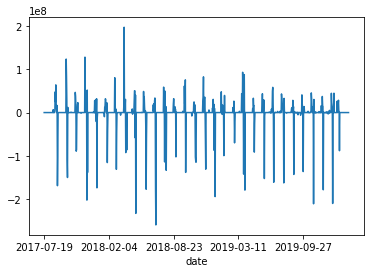

In [45]:
money_flow_df.index = money_flow_df['date']
money_flow_df['money_change'].plot()